In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import pandas as pd

In [2]:
g2_data = pd.read_csv("C:/Users/maris/Documents/QC_Modeling_Bayesian/data/g2_data.csv",usecols=['g2'])

In [23]:
n_count_data = len(g2_data)

Text(0.5, 0, 'time')

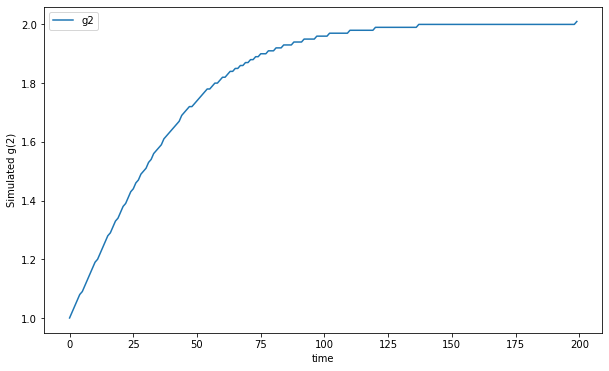

In [24]:
g2_data.plot(figsize=(10,6))
plt.ylabel("Simulated g(2)")
plt.xlabel("time")

In [27]:
with pm.Model() as g2_model:
    time_g2 = pm.Data("g2_data",g2_data["g2"])

    nu = pm.Exponential('nu',1)
    sigma = pm.Exponential('sigma',10)
    
    # We can now figure out the shape of variables based on the
    # index of the dataset
    #s = pm.GaussianRandomWalk("s", sigma=sigma)
    # instead of:
    s = pm.GaussianRandomWalk('s', sigma, shape=n_count_data)
    
   # test_process = pm.Deterministic(
       # "test_process", pm.math.exp(-2 * s) ** 0.5)
   # r = pm.StudentT(
      #  "r", nu=nu, sigma=test_process, observed=time_g2)

In [ ]:
#map_estimate = pm.find_MAP(model = g2_model)
#map_estimate

In [18]:
with g2_model:
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, sigma, nu]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:26<00:00, 371.26draws/s]


C:\Users\maris\anaconda3\envs\pymc3-env\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'nu'}>,
        <AxesSubplot:title={'center':'nu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

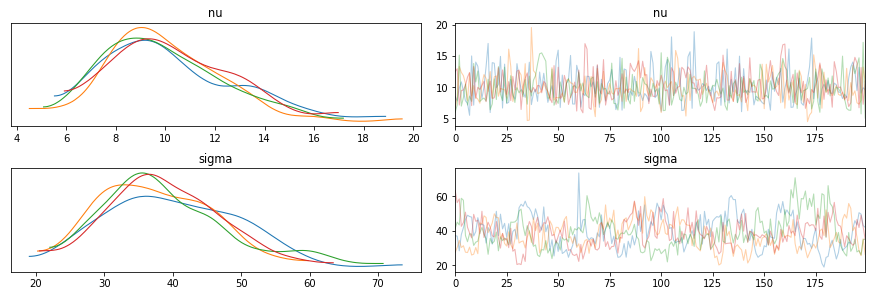

In [11]:
az.plot_trace(trace, var_names=["nu", "sigma"])

[Text(0.5, 1.0, 'Simulated g2'), Text(0.5, 0, 'time'), Text(0, 0.5, 'g2(tau)')]

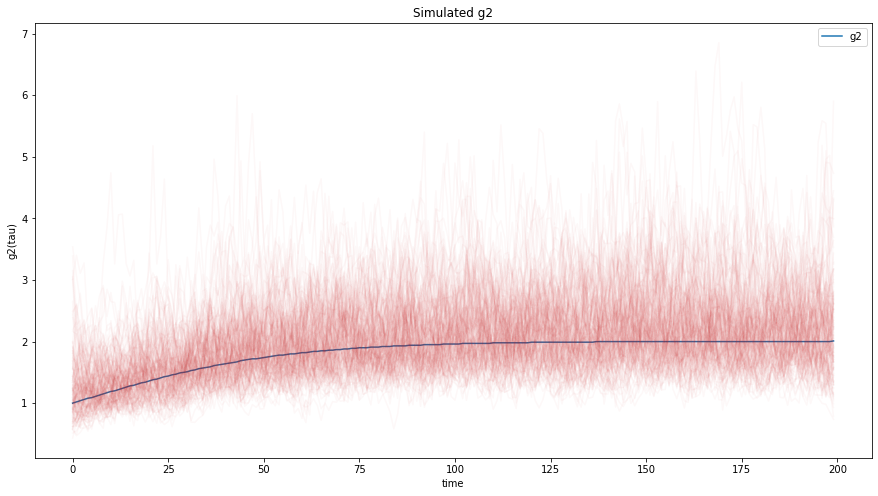

In [15]:
fig, ax = plt.subplots(figsize = (15, 8))
g2_data.plot(ax=ax)
ax.plot( g2_data.index,1/np.exp(trace["s", ::5].T), "C3", alpha = 0.03)
ax.set(title = "Simulated g2", xlabel="time", ylabel = "g2(tau)")